In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sbn

In [3]:
veri = pd.read_csv("C:/Users/benli/OneDrive/Masaüstü/karcher.csv")
veri.head()

,Column 1,Column 2
0,Fiyat,10.800 TL
1,NaN,12.500 TL
2,NaN,23.000 TL
3,NaN,NaN
4,NaN,11.000 TL


Sütunların Yerlerini ve İsimlerini Değiştirme İşlemi

In [5]:
veri = pd.DataFrame(veri)
veri = veri[['Column 2', 'Column 1']]
veri.rename(columns={'Column 1': 'Birim', 'Column 2': 'Fiyatlar'}, inplace=True)
veri

,Fiyatlar,Birim
0,10.800 TL,Fiyat
1,12.500 TL,NaN
2,23.000 TL,NaN
3,NaN,NaN
4,11.000 TL,NaN
5,18.000 TL,NaN
6,14.900 TL,NaN
7,15.500 TL,NaN
8,25.000 TL,NaN
9,22.000 TL,NaN


NaN Değerleri Veriden Çıkarma İşlemi

In [9]:
veri.loc[0, 'Birim'] = 'TL'
veri.loc[0, 'Fiyatlar'] = '10.800 TL'
veri['Birim'].fillna('TL', inplace=True)


In [15]:
veri['Birim'].fillna('Fiyat', inplace=True)
veri = veri.dropna(subset=['Fiyatlar'], axis=0)
veri['Birim'].fillna('Fiyat', inplace=True)
veri['Birim'].fillna('Fiyat', inplace=True)


In [17]:
veri['Fiyatlar'] = veri['Fiyatlar'].astype(str).apply(lambda x: '{:.3f}'.format(float(x.replace(' TL', '').strip())))

In [19]:
print(veri)

   Fiyatlar Birim
0    10.800    TL
1    12.500    TL
2    23.000    TL
4    11.000    TL
5    18.000    TL
6    14.900    TL
7    15.500    TL
8    25.000    TL
9    22.000    TL
10   24.000    TL
11   22.000    TL
12   19.500    TL
13   18.500    TL
14   18.800    TL
15   18.500    TL
16   12.500    TL
17   12.000    TL
18   15.250    TL


Fiyatlar Sütununu Float Veri Tipine Dönüştürme

In [22]:
veri['Fiyatlar'] = veri['Fiyatlar'].str.replace(' TL', '').astype(float)

Veri Görselleştirme - Box Plot

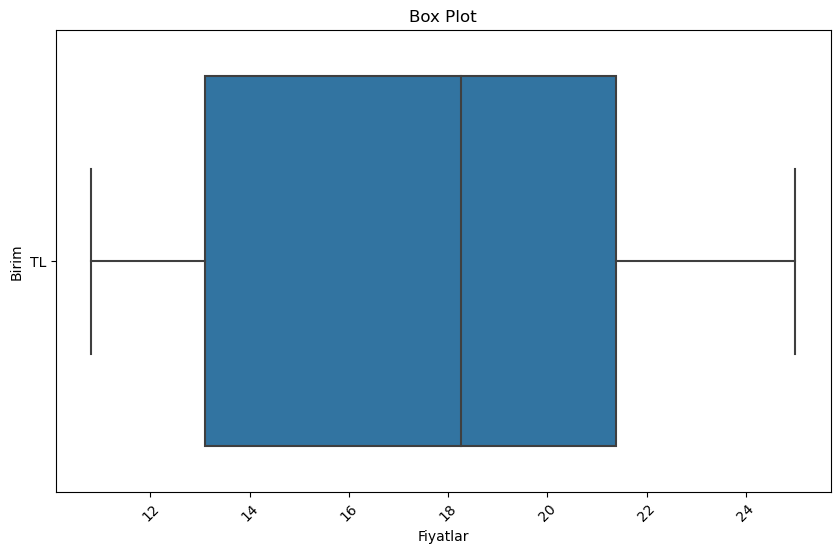

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fiyatlar', y='Birim', data=veri)
plt.xticks(rotation=45)
plt.title('Box Plot')
plt.show()

Betimsel İstatistik Değerleri

In [28]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiyatlar,18.0,17.430556,4.603807,10.8,13.1,18.25,21.375,25.0


IQR ve Çeyreklikler Değerlerinin Hesaplanmas

In [31]:
Q1 = veri['Fiyatlar'].quantile(0.25)
Q3 = veri['Fiyatlar'].quantile(0.75)
IQR = Q3 - Q1

Q1,Q3,IQR

(13.1, 21.375, 8.275)